# Applied Deep Learning - ass#2
Carnegie Mellon University

@msahinoz

The goal is to explore the MNIST Handwritten Digits dataset and complete the following steps:

- Visualize data: Plot one example from each class (0 to 9) to understand the data distribution.
- Grayscale analysis: Select two digit classes, plot histograms of pixel intensity values, and analyze differences.
- Build a neural net: Create a simple model to classify digits using pixel values as inputs.
- Evaluate performance: Train, validate, and visualize model performance using loss and accuracy curves.
- Calculate parameters: Compare your manual parameter calculation to TensorFlow's model.summary().



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

Visualizing data

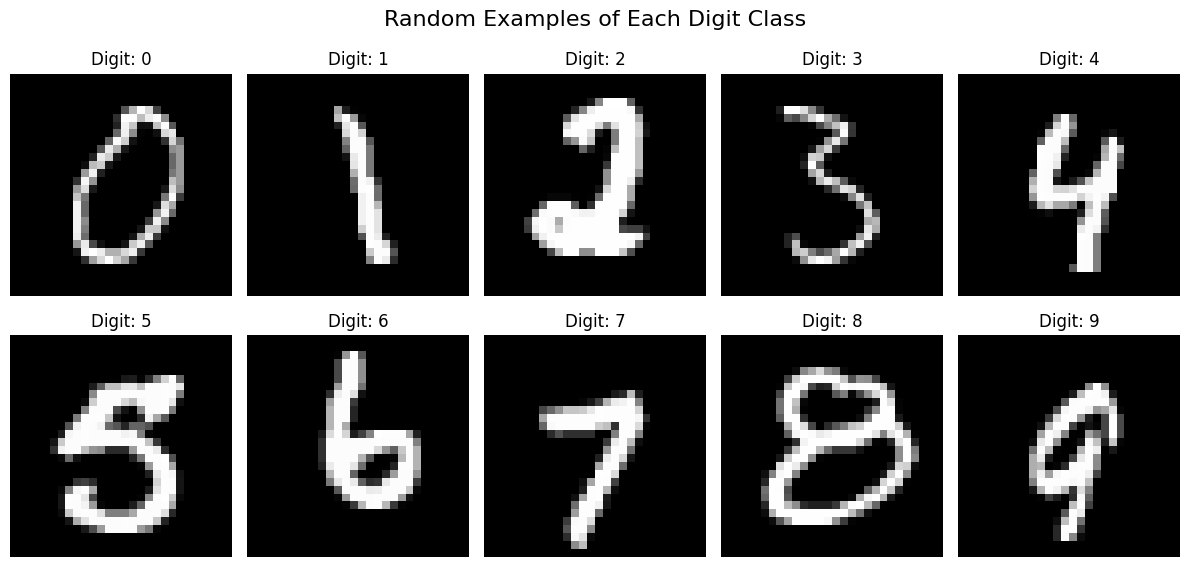

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Random Examples of Each Digit Class', fontsize=16)

for i in range(10):
    ax = axes[i // 5, i % 5]
    class_indices = np.where(y_train == i)[0]
    random_index = np.random.choice(class_indices)
    ax.imshow(X_train[random_index], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Digit: {i}")

plt.tight_layout()
plt.show()

Grayscale histogram analysis

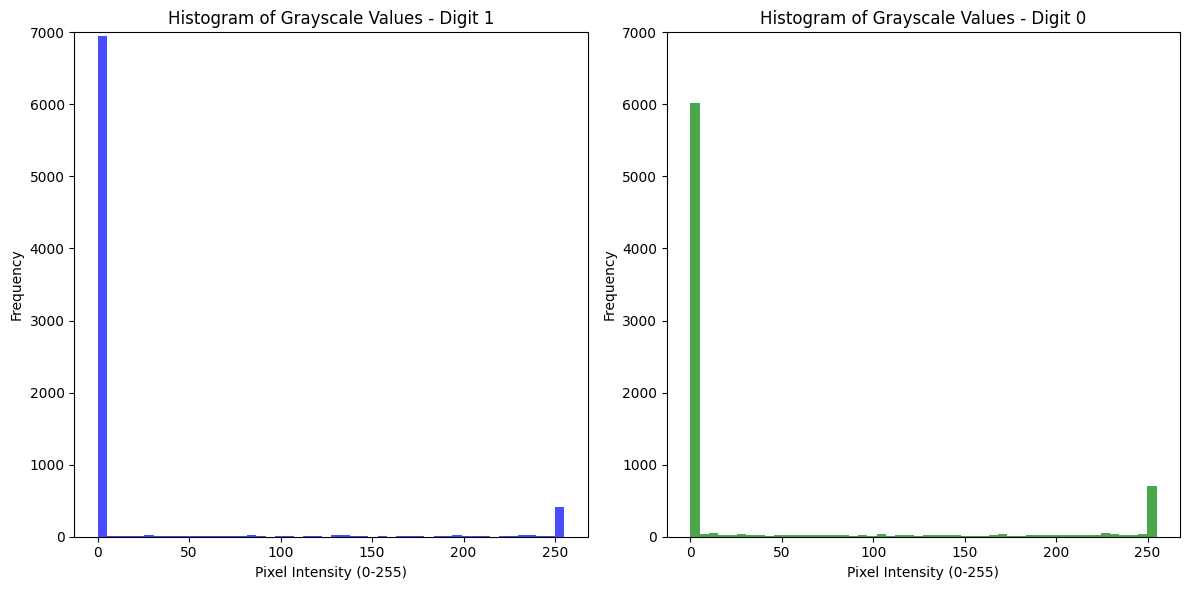

In [4]:
class_1 = 1
class_2 = 0

np.random.seed(42)
class_1_indices = np.random.choice(np.where(y_train == class_1)[0], size=10, replace=False)
class_2_indices = np.random.choice(np.where(y_train == class_2)[0], size=10, replace=False)

class_1_pixels = np.array([X_train[i].flatten() for i in class_1_indices]).flatten()
class_2_pixels = np.array([X_train[i].flatten() for i in class_2_indices]).flatten()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(class_1_pixels, bins=50, color='blue', alpha=0.7, range=(0, 255))
plt.title(f'Histogram of Grayscale Values - Digit {class_1}')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.ylim(0, 7000)

plt.subplot(1, 2, 2)
plt.hist(class_2_pixels, bins=50, color='green', alpha=0.7, range=(0, 255))
plt.title(f'Histogram of Grayscale Values - Digit {class_2}')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.ylim(0, 7000)

plt.tight_layout()
plt.show()

Building the Neural Net

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Check TF version & whether GPU is in use:

In [6]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("List of devices:")
for device in tf.config.list_physical_devices():
    print(device)

TensorFlow version: 2.16.2
Num GPUs Available: 1
List of devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [7]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [8]:
# normalize daya via scaling pixel values to 0-1 from 0-255
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # convert 28*28 to 1d vector
    layers.Dense(128, activation='relu'), # 1st hidden layer
    layers.Dense(64, activation='relu'), # 2nd hidden layer
    layers.Dense(10, activation='softmax') # output layer for 10 classes (all digits classified)
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()


/opt/anaconda3/envs/applieddeeplearning_gpu/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-06 12:32:12.092943: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-04-06 12:32:12.092971: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-06 12:32:12.092977: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-06 12:32:12.092991: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-06 12:32:12.093000: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [ ]:
import os
from tensorflow.keras.models import load_model

# Check if model already exists
if os.path.exists("mnist_model_base.h5"):
    print("Loading saved model...")
    model = load_model("mnist_model_base.h5")
else:
    print("🚀 Training model from scratch...")
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train_normalized, y_train, epochs=20,
                        validation_data=(X_test_normalized, y_test),
                        batch_size=64)
    model.save("mnist_model_base.h5")

In [ ]:
# history = model.fit(X_train_normalized, y_train, epochs=20, validation_data=(X_test_normalized, y_test), batch_size=64)

In [24]:
# model.save('mnist_model.h5')
print("Model saved as 'mnist_model.h5'")

Model saved as 'mnist_model.h5'


START FROM HERE!

Visualizing the performance

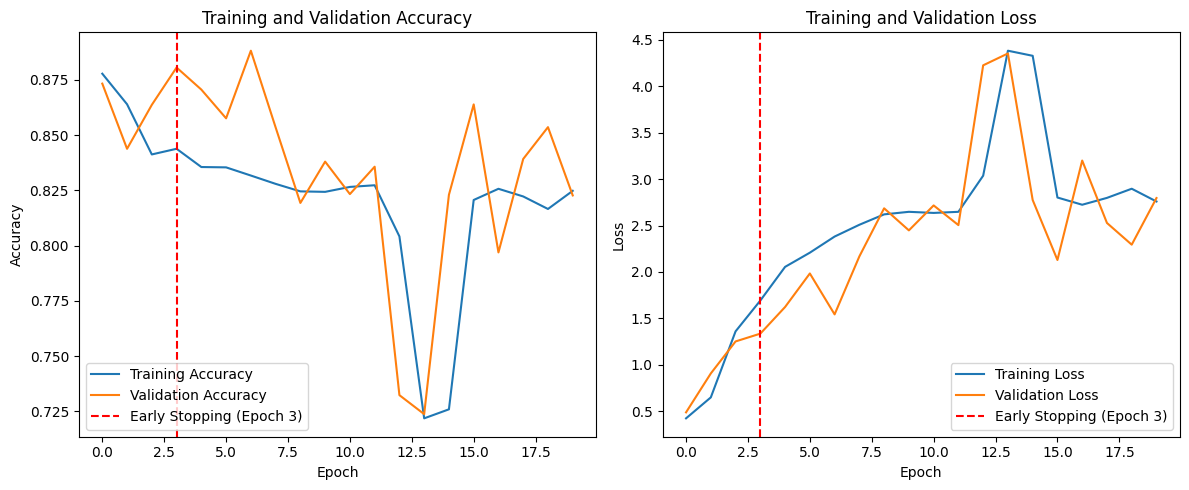

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=3, color='red', linestyle='--', label='Early Stopping (Epoch 3)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=3, color='red', linestyle='--', label='Early Stopping (Epoch 3)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Applied Deep Learning - ass#3
Carnegie Mellon University

@msahinoz

Histogram of model weight values (all the weight values on one histogram)

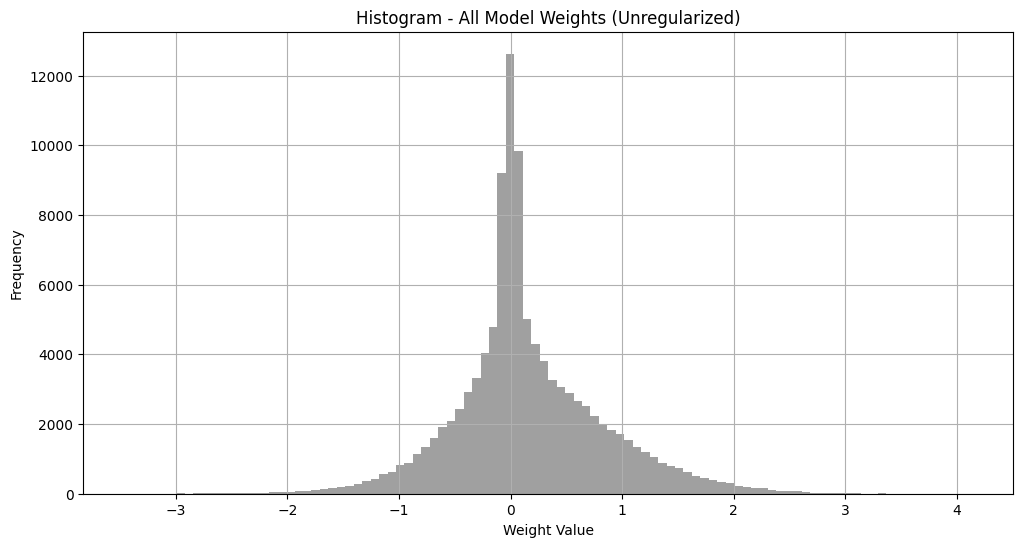

In [11]:
all_weights = []
for layer in model.layers:
    if hasattr(layer, 'kernel'):  # check if layer has weights
        weights = layer.get_weights()[0].flatten() # flatten to an 1d array
        all_weights.extend(weights)

plt.figure(figsize=(12, 6))
plt.hist(all_weights, bins=100, color='gray', alpha=0.75)
plt.title("Histogram - All Model Weights (Unregularized)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Histogram of model weight values (individual layers)

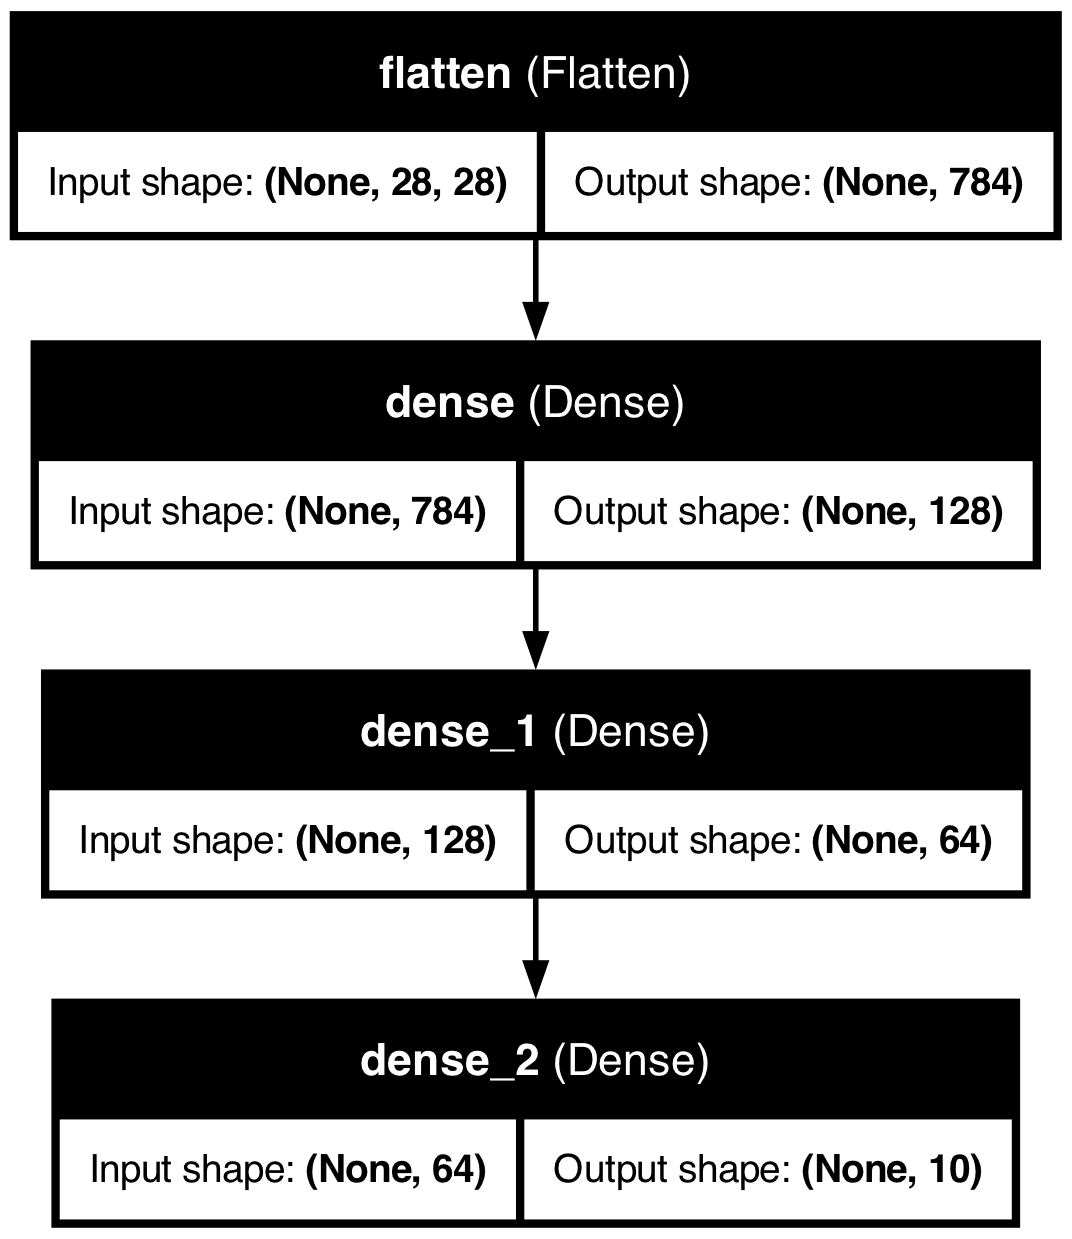

In [12]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, Sequential

# Save the diagram as an image
plot_model(model, to_file="mnist_model_architecture.png", show_shapes=True, show_layer_names=True)

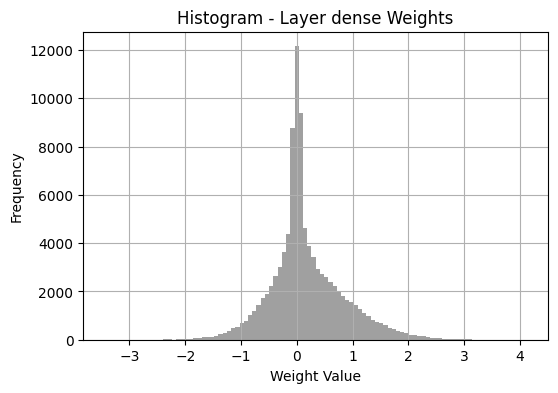

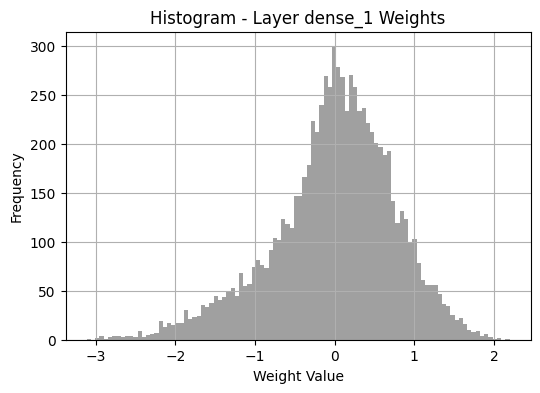

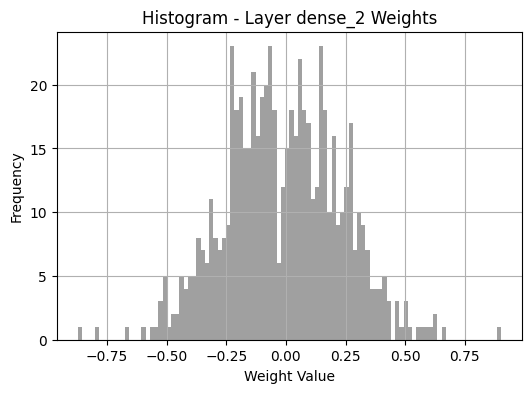

In [21]:
for layer in model.layers:
    if hasattr(layer, 'kernel'):  # check if layer has weights
        weights = layer.get_weights()[0].flatten()  # flatten to a 1D array

        plt.figure(figsize=(6, 4))
        plt.hist(weights, bins=100, color='gray', alpha=0.75)
        plt.title(f"Histogram - Layer {layer.name} Weights")
        plt.xlabel("Weight Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

L2 Regularization

In [ ]:
import os
from tensorflow.keras.models import load_model

# Check if model already saved
if os.path.exists("mnist_model_l2.h5"):
    print("Loaded L2-regularized model from file")
    model_l2 = load_model("mnist_model_l2.h5")
else:
    print("🚀 Training L2-regularized model from scratch")
    model_l2 = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(10, activation='softmax')
    ])
    model_l2.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

    history_l2 = model_l2.fit(X_train_normalized, y_train,
                              epochs=20,
                              validation_data=(X_test_normalized, y_test),
                              batch_size=64)

    model_l2.save("mnist_model_l2.h5")

In [34]:
model_l2.save("mnist_model_l2.h5")

Regularized model weight comparision

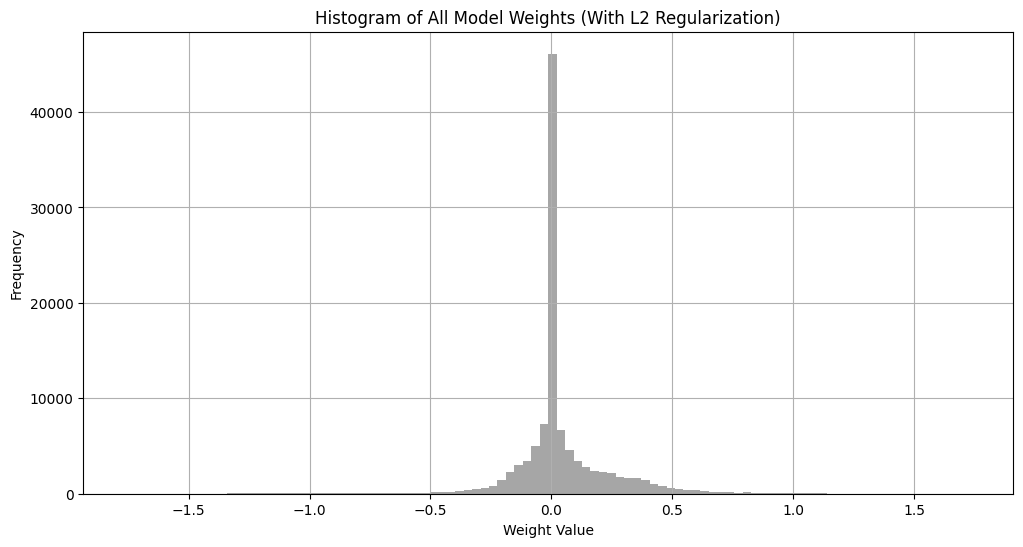

In [36]:
reg_weights = []
for layer in model_l2.layers:
    if hasattr(layer, 'kernel'):
        weights = layer.get_weights()[0].flatten()
        reg_weights.extend(weights)

plt.figure(figsize=(12, 6))
plt.hist(reg_weights, bins=100, color='gray', alpha=0.7)
plt.title("Histogram of All Model Weights (With L2 Regularization)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Hyperparameter tuning - Grid Search

In [37]:
def build_and_train(units_1, units_2, name):
    print(f"\n Training: {name}")
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(units_1, activation='relu'),
        layers.Dense(units_2, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train_normalized, y_train,
                        epochs=10,
                        validation_data=(X_test_normalized, y_test),
                        verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"Final Val Accuracy: {val_acc:.4f}")
    return history, val_acc

# run 3 models
h1, acc1 = build_and_train(64, 32, "Small (64-32)")
h2, acc2 = build_and_train(128, 64, "Original (128-64)")
h3, acc3 = build_and_train(256, 128, "Large (256-128)")

# compare
print("\n Accuracy Comparison:")
print(f"Small  (64-32):   {acc1:.4f}")
print(f"Medium (128-64):  {acc2:.4f}")
print(f"Large  (256-128): {acc3:.4f}")



🔧 Training: Small (64-32)
Final Val Accuracy: 0.8477

🔧 Training: Original (128-64)
Final Val Accuracy: 0.8138

🔧 Training: Large (256-128)
Final Val Accuracy: 0.8496

🏁 Accuracy Comparison:
Small  (64-32):   0.8477
Medium (128-64):  0.8138
Large  (256-128): 0.8496


In [39]:
import random

def random_architecture_search(trials=3):
    results = []
    for i in range(trials):
        u1 = random.randint(0, 300)
        u2 = random.randint(0, 150)
        name = f"Trial {i+1} ({u1}-{u2})"
        print(f"\n {name}")
        history, acc = build_and_train(u1, u2, name)
        results.append((name, acc))
    
    results.sort(key=lambda x: x[1], reverse=True)
    print("\n Best Architectures by Val Accuracy:")
    for name, acc in results:
        print(f"{name}: {acc:.4f}")

random_architecture_search(trials=3)


 Trial 1 (104-36)

🔧 Training: Trial 1 (104-36)
Final Val Accuracy: 0.8514

 Trial 2 (109-30)

🔧 Training: Trial 2 (109-30)
Final Val Accuracy: 0.8545

 Trial 3 (153-87)

🔧 Training: Trial 3 (153-87)
Final Val Accuracy: 0.8585

 Trial 4 (217-98)

🔧 Training: Trial 4 (217-98)
Final Val Accuracy: 0.8661

 Trial 5 (133-83)

🔧 Training: Trial 5 (133-83)


KeyboardInterrupt: 